In [1]:
import numpy as np 
import csv 
import pandas as pd
from scipy.linalg import dft
from scipy import fft
from scipy.fft import ifft
import matplotlib.pyplot as plt 
#import bitarray
import pdb
from scipy.io.wavfile import write # For writing to a .wav file
from scipy.io.wavfile import read # For reading from a .wav file to an np array.
from scipy import signal # Module for generating chirp.

In [2]:
# Constants
sample_rate = 44100

In [4]:
# Useful helper functions for converting between np arrays and wav files.
def convert_array_to_wav(array, sample_rate):
  # Convert the array to a wav file.
  write("output.wav", sample_rate, array)

def convert_wav_to_array(wav_filename):
  rate, array = read(wav_filename)

  return array

# Generate an array of zero-mean unit energy white Gaussian noise.
def generateGaussianWhiteNoise(mean, standard_deviation, duration, sample_rate):
  number_of_samples = duration*sample_rate
  white_noise = np.random.normal(mean, standard_deviation, number_of_samples)
  return white_noise

# Compute PSD of the received signal.
def computePSD(received_signal, sample_rate):
  frequencies, received_signal_PSD = signal.welch(received_signal, fs=sample_rate)

  return frequencies, received_signal_PSD

In [5]:
# Transmitter
# Generate zero-mean unit energy white noise signal.
white_noise = generateGaussianWhiteNoise(0, 1, 10, sample_rate)


# Convert noise to .wav file.
convert_array_to_wav(white_noise, sample_rate)

In [7]:
# Receiver
# Convert received signal to np array.
received_signal = convert_wav_to_array("input.wav")

# Compute the PSD of the received signal.
frequencies, received_signal_PSD = computePSD(received_signal, sample_rate)

# Estimate the amplitude of the frequency response of the impulse response from the received signal PSD.
H_amplitude_est = np.sqrt(received_signal_PSD)

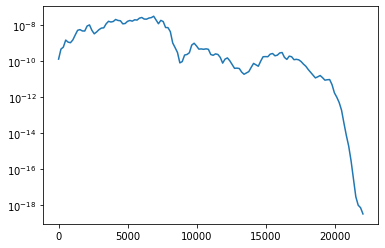

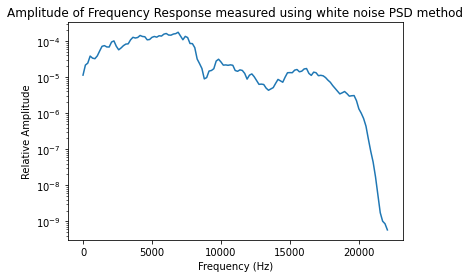

In [8]:
# Plot PSD of received signal
fig, ax = plt.subplots()
x = frequencies
plt.yscale('log')
ax.plot(x, received_signal_PSD);
fig.show()

# Plot amplitude frequency response of channel
fig, ax = plt.subplots()
x = frequencies
plt.yscale('log')
plt.title('Amplitude of Frequency Response measured using white noise PSD method')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Relative Amplitude')
ax.plot(x, H_amplitude_est);
fig.show()